## A dimension reduction demo.

Your task is to find a dimension reducing functional representation for a turbomachinery data-set!

In [1]:
%matplotlib notebook
from equadratures import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from mpl_toolkits.mplot3d import axes3d

In [2]:
X = np.loadtxt('X.dat')
y = np.loadtxt('y.dat')

In [3]:
s = Parameter(distribution='uniform', lower=-1., upper=1., order=2)
myparameters = [s for _ in range(0, 25)]
mybasis = Basis('total-order')
mypoly = Poly(parameters=myparameters, basis=mybasis, method='least-squares', \
              sampling_args= {'mesh': 'user-defined', 'sample-points': X, 'sample-outputs': y})
mypoly.set_model()

## Step 1. Compute the dimension reducing subspace

In [4]:
mysubspace = Subspaces(full_space_poly=mypoly, method='active-subspace')
W = mysubspace.get_subspace()
e = mysubspace.get_eigenvalues()

<IPython.core.display.Javascript object>


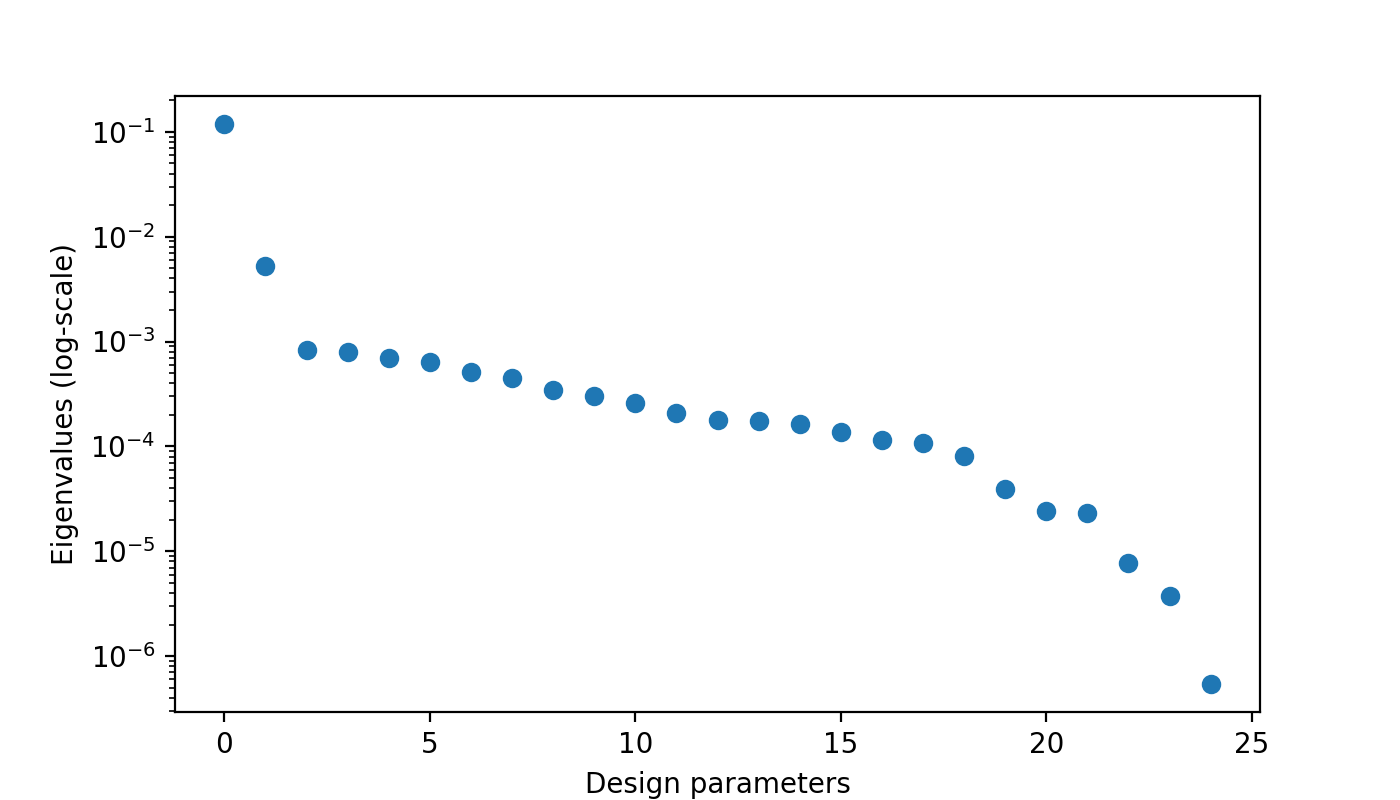

In [5]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111)
plt.semilogy(e, 'o')
plt.ylabel('Eigenvalues (log-scale)')
plt.xlabel('Design parameters')
plt.show()

In [6]:
true_dimensions = 1
u = X @ W[:, 0:true_dimensions]

<IPython.core.display.Javascript object>


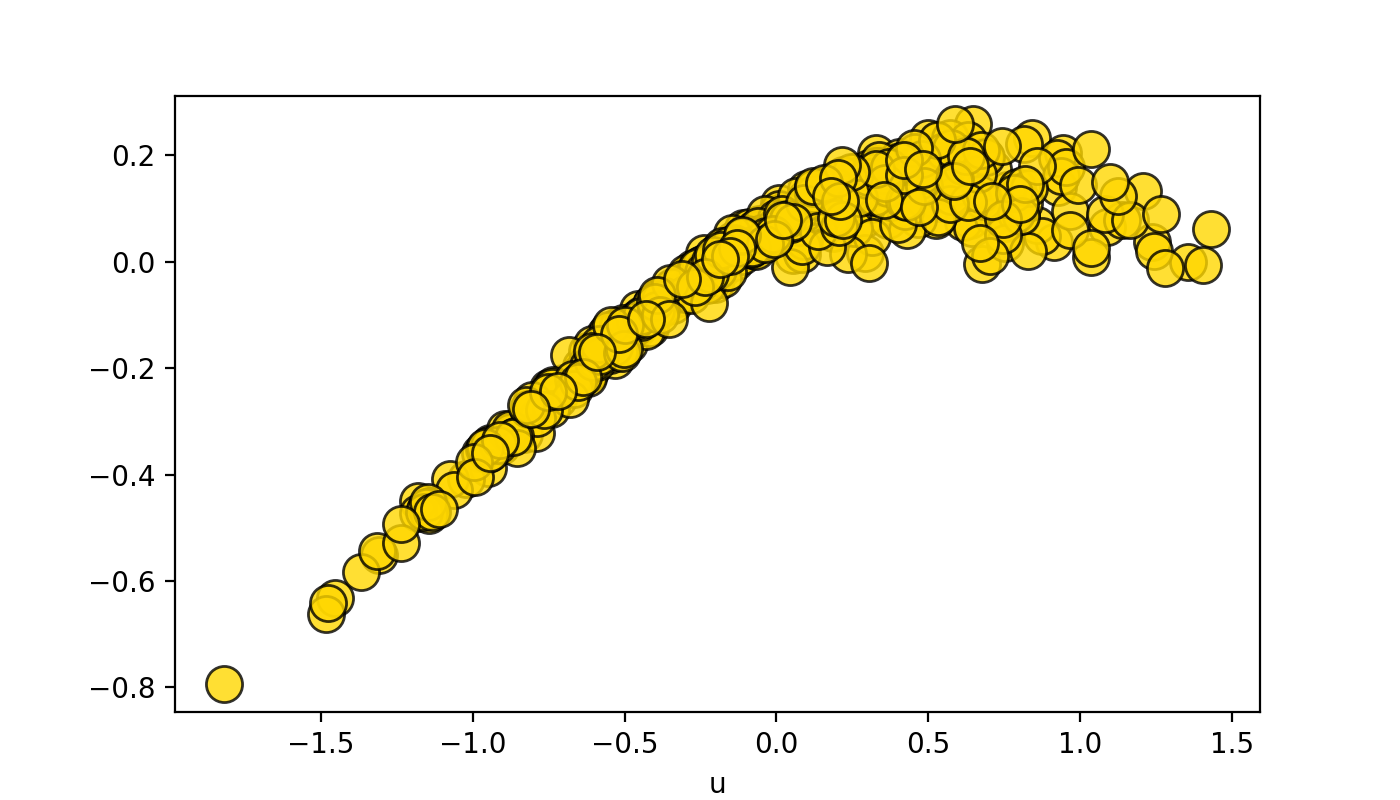

In [8]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111)
plt.plot(u[:,0], y, 'o', color='gold', markeredgecolor='k', lw=1, ms=13, alpha=0.8)
plt.xlabel('u')
plt.show()

In [9]:
true_dimensions = 2
u = X @ W[:, 0:true_dimensions]

<IPython.core.display.Javascript object>


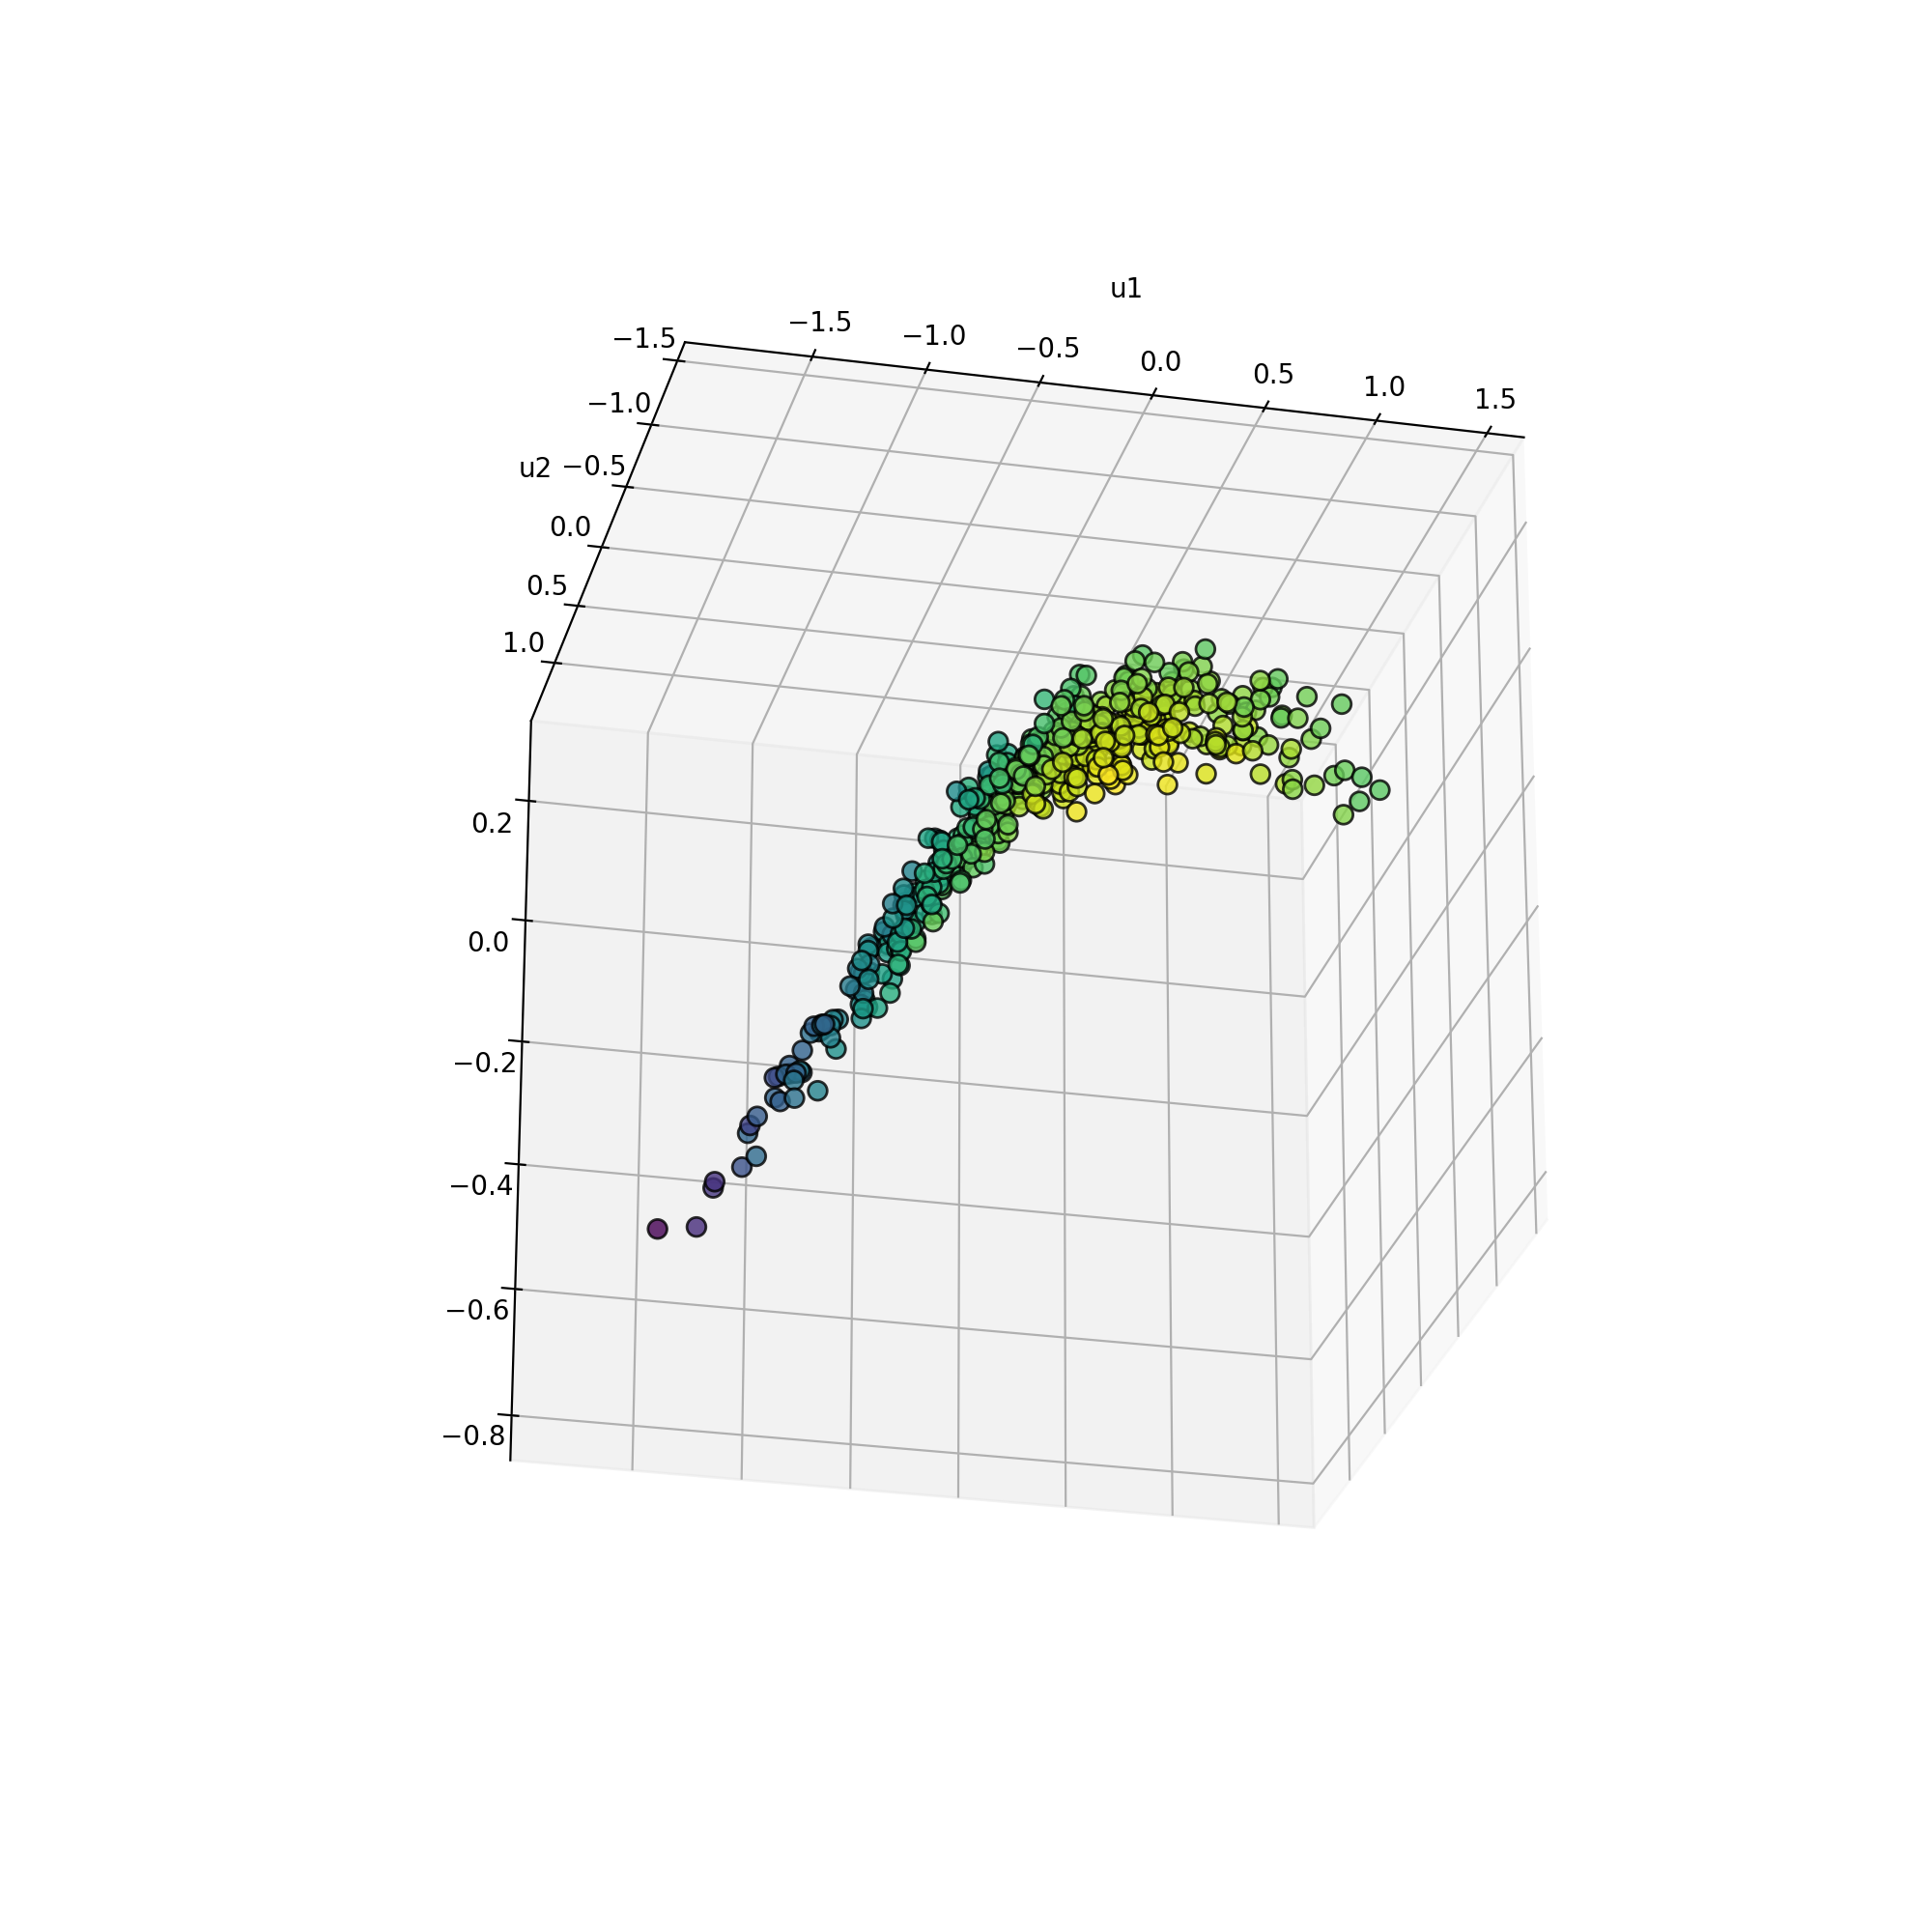

In [11]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(u[:,0],u[:,1], y, s=50, c=y, marker='o', edgecolor='k', lw=1, alpha=0.8)                                                                               
ax.set_xlabel('u1')
ax.set_ylabel('u2')
plt.show()